In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mean_01 = np.array([1,0.5])
cov_01 = np.array([[1,0.1],[0.1,1.2]])

mean_02 = np.array([4,5])
cov_02 = np.array([[1.21,0.1],[0.1,1.3]])


# Normal Distribution
dist_01 = np.random.multivariate_normal(mean_01,cov_01,500)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,500)

print(dist_01.shape)
print(dist_02.shape)

(500, 2)
(500, 2)


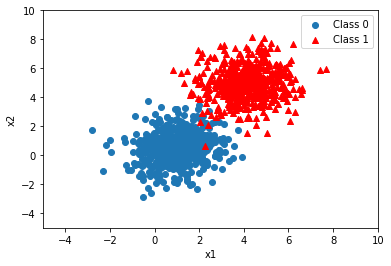

In [3]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [4]:
data = np.zeros((1000,3))
print(data.shape)

(1000, 3)


In [5]:
# set first 500 rows to dist_01
data[:500,:2] = dist_01

# set rows 500 onwards to dist_02
data[500:,:2] = dist_02

# set output of first 500 nos to 1 rest are automatically 0
data[500:,2] = np.ones((500,))

# now shuffle the data
np.random.shuffle(data)

In [6]:
split = int(0.8*data.shape[0])

In [39]:
X_train = data[:split,:-1]
X_test = data[split:,:-1]

Y_train = data[:split,-1]
Y_test  = data[split:,-1]

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)

(800, 2) (200, 2)
(800,) (200,)


In [8]:
def hypothesis(X,theta):
    hx=np.dot(X,theta);
    return sigmoid(hx);

def sigmoid(hx):
    return 1.0/(1.0+np.exp(-1*hx));

def Gradient(X,theta,y):
    m=X.shape[0]
    hx=hypothesis(X,theta);
    grad=np.dot(X.T,(hx-y))
    return grad/m;

def error(X,theta,y):
    m,n=X.shape;
    hx=hypothesis(X,theta);
    err=0;
    for i in range(m):
        err+=y[i]*np.log2(hx[i])+(1-y[i])*np.log2(1-hx[i]);
    return -err/m;
    
def GradientDescent(X,y,iteration):
    alpha=0.3;
    m,n=X.shape;
    theta=np.zeros((n,));
    err=[];
    for i in range(iteration):
        e=error(X,theta,y);
        stepsize=alpha*Gradient(X,theta,y);
        theta=theta-stepsize;
        err.append(e);
    
    return theta,err;
    


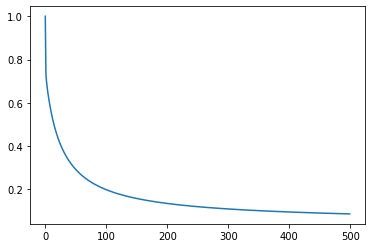

In [9]:
m,n=X_train.shape
ones=np.ones((m,1));
X_train=np.hstack((ones,X_train));
iteration=500;
best_theta,loss=GradientDescent(X_train,Y_train,iteration);
plt.plot(loss);

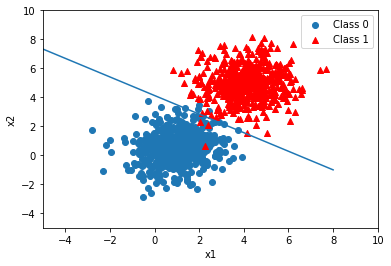

In [12]:
plt.figure(0)

plt.scatter(dist_01[:,0],dist_01[:,1],label='Class 0')
plt.scatter(dist_02[:,0],dist_02[:,1],color='r',marker='^',label='Class 1')
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

# dicision boundary 
# theta[0]+theta[1]*x1+theta[2]*x2=0;
# x2=-(theta[0]+theta[1]*x1)/theta[2];

x1=np.linspace(-5,8,20);
x2=-(best_theta[0]+best_theta[1]*x1)/best_theta[2];
plt.plot(x1,x2);
plt.show()

In [41]:
def Predict(X_test,theta,Y_test):
    Y_output=hypothesis(X_test,theta);
    Y_Out=[];
    for i in  Y_output:
        if(i>=0.5):
            Y_Out.append(1);
        else:
            Y_Out.append(0);
    return ((Y_Out==Y_test).sum())/Y_test.shape[0]

In [42]:
X_test = data[split:,:-1]
Y_test  = data[split:,-1]

In [43]:
# now check for test set
m,n=X_test.shape
ones=np.ones((m,1));
X_test=np.hstack((ones,X_test));
print(X_test.shape,best_theta.shape);
Predict(X_test,best_theta,Y_test)


(200, 3) (3,)


0.995

In [34]:
x1= np.ones((3,))
x2=np.ones((3,1))
print(x1);
print(x2);
y=[[1,2,3],[4,5,6],[7,8,9]]
print(y)
y=np.mat(y)
print(y)
y.shape


[1. 1. 1.]
[[1.]
 [1.]
 [1.]]
[[0.]
 [0.]
 [0.]]
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


(3, 3)

In [32]:
ans1=np.dot(y,x2)
print(ans1)
ans1.shape

[[ 6.]
 [15.]
 [24.]]


(3, 1)

In [33]:
ans2=np.dot(y,x1)
print(ans2)
ans2.shape

[[ 6. 15. 24.]]


(1, 3)

In [30]:
arr=np.zeros((4,3))
print(arr)
ones=np.ones((4,1))
np.hstack((ones,arr))

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1.]
 [1.]
 [1.]
 [1.]]


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [17]:
arr=np.negative(arr+1)
arr=np.exp(arr)

np.reciprocal(arr)

array([[7.3890561],
       [7.3890561],
       [7.3890561],
       [7.3890561]])